In [70]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt




# Check if CUDA is available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

Using device: cuda:0


In [90]:

# Define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 256)  # Input layer
        self.fc2 = nn.Linear(256, 256) # Hidden layer
        self.fc3 = nn.Linear(256, 1)  # Output layer
        self.VecBias= torch.randn((1, 256), dtype= torch.float32, device=device)*1e-6
        self.VecBias= torch.nn.Parameter(self.VecBias)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))#+self.VecBias
        x = self.fc3(x)
        return x
# Create the model and move it to the GPU
model = Net().to(device)
losses= []

In [91]:
# Generate data
x = np.linspace(-10, 10, 1000).reshape(-1, 1).astype(np.float32)
y = x**2

# Convert data to PyTorch tensors
x_tensor = torch.from_numpy(x).to(device)
y_tensor = torch.from_numpy(y).to(device)

# Create a DataLoader
dataset = TensorDataset(x_tensor, y_tensor)
loader = DataLoader(dataset, batch_size=256, shuffle=True)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 10000
for epoch in tqdm(range(epochs)):
    for inputs, labels in loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    
    # if epoch % 10 == 0:
    #     print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

print("Training complete.")
print(loss)


100%|██████████| 10000/10000 [01:44<00:00, 95.79it/s]

Training complete.
tensor(0.0389, device='cuda:0', grad_fn=<MseLossBackward0>)


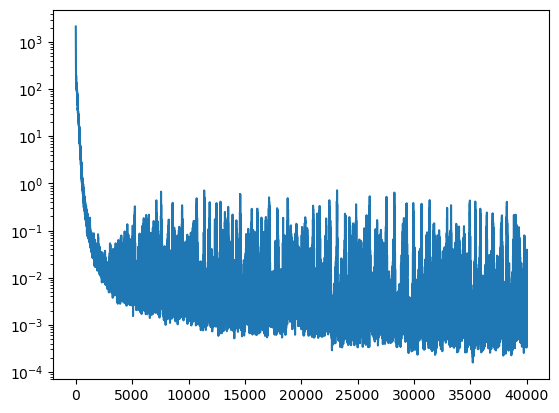

In [92]:
plt.plot(losses)
plt.yscale("log")

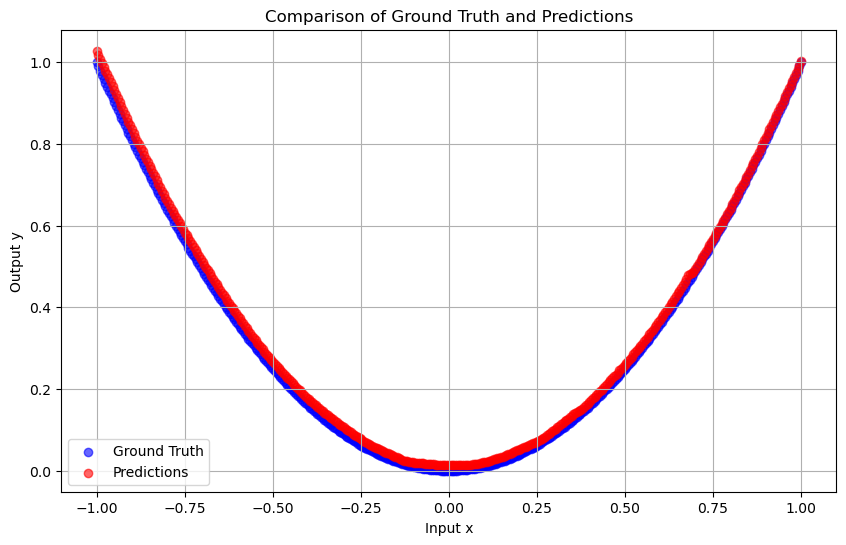

In [93]:

# Model evaluation
model.eval()  # Set the model to evaluation mode

# Generate a range of values for testing
with torch.no_grad():  # Disable gradient computation for inference
    x_test = np.linspace(-1, 1, 400).reshape(-1, 1).astype(np.float32)
    x_test_tensor = torch.from_numpy(x_test).to(device)
    y_pred_tensor = model(x_test_tensor)
    y_pred = y_pred_tensor.cpu().numpy()  # Move predictions back to CPU for plotting

# Ground truth
y_true = x_test**2

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_true, color='blue', label='Ground Truth', alpha=0.6)
plt.scatter(x_test, y_pred, color='red', label='Predictions', alpha=0.6)
plt.title('Comparison of Ground Truth and Predictions')
plt.xlabel('Input x')
plt.ylabel('Output y')
plt.legend()
plt.grid(True)
plt.show()